# Natural Gas Price Prediction

## Project Overview

### Objective
The primary objective of this project is to enhance the granularity and quality of market data for accurately pricing natural gas storage contracts. This involves extrapolating data from external feeds and incorporating seasonal trends to provide detailed historical and future price estimates.

### Background
Natural gas storage contracts are crucial for various stakeholders in the commodities supply chain, including producers, refiners, transporters, and distributors, as well as trading firms looking to exploit seasonal or intra-day price differentials. These contracts specify the terms for storing a physical commodity, such as natural gas, in a warehouse for a designated period. Accurate pricing of these contracts is essential for making informed trading decisions and optimizing storage strategies.

### Scope
The project will focus on:
1. **Data Collection and Enhancement**: Gather and refine market data from external feeds to ensure high quality and granularity.
2. **Seasonal Trend Analysis**: Analyze historical price data to identify and incorporate seasonal trends, particularly how natural gas prices fluctuate throughout the year.
3. **Price Prediction Model**: Develop a robust model to estimate future natural gas prices based on historical data and identified trends.
4. **Implementation and Integration**: Integrate the enhanced data and predictive model into our trading systems to support the accurate pricing of natural gas storage contracts.

### Expected Outcome
By the end of this project, we aim to:
- Provide the trading desk with precise and granular data for natural gas pricing.
- Enable accurate pricing of natural gas storage contracts, benefiting clients and optimizing trading strategies.
- Improve the ability to predict future gas prices, thus enhancing decision-making processes for trading and storage strategies.

## Problem Statement

Accurate pricing of natural gas storage contracts is hindered by the current lack of high-quality, granular market data. This deficiency affects our ability to predict future prices and identify seasonal trends, which are crucial for making informed trading decisions and optimizing storage strategies. We need to enhance and extrapolate available data to enable precise contract pricing and better support our clients and trading activities.

## Metric

We used Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the performance of our SARIMA model. These metrics measure the average magnitude of errors between the actual and predicted values, providing valuable insights into the model's accuracy and performance.

In [12]:
import pandas as pd
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

In [13]:
df = pd.read_csv('data/Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [14]:
df["Dates"] = pd.to_datetime(df["Dates"])

In [15]:
time_series = df.set_index("Dates")
time_series

,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


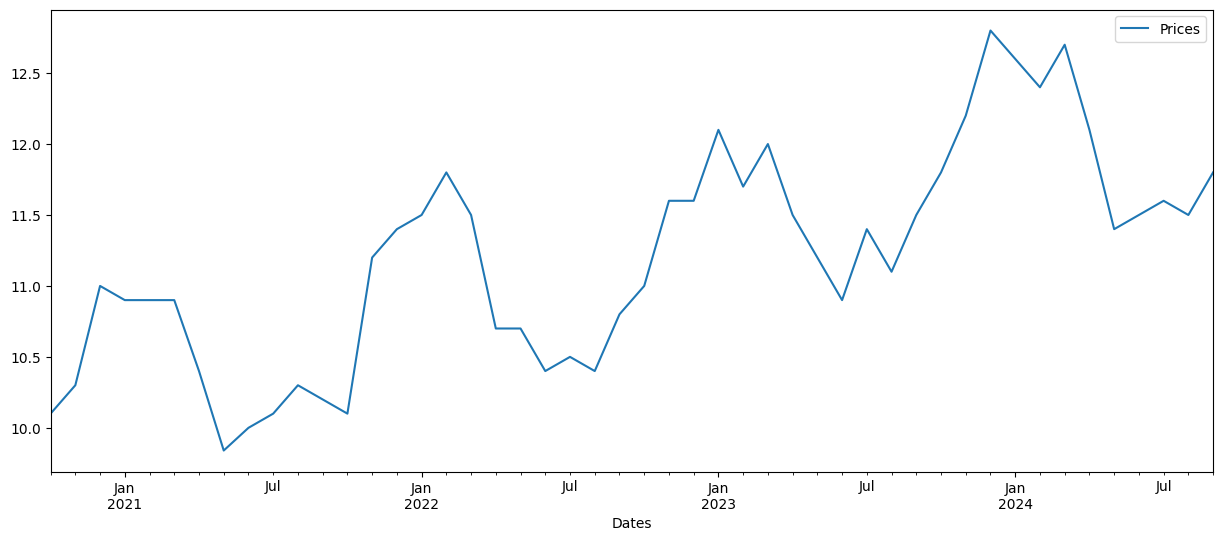

In [16]:
time_series.plot(figsize=(15, 6));

In [17]:
def check_stationary(timeseries):
    result = adfuller(timeseries)
    p_value = result[1] 
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

In [18]:
check_stationary(time_series)

ADF Statistic: 0.21807686169999216
p-value: 0.9732574388448689
Non-Stationary


In [19]:
model = SARIMAX(time_series, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit(disp=0)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  -1.181
Date:                            Fri, 31 May 2024   AIC                              8.362
Time:                                    15:22:43   BIC                             13.028
Sample:                                10-31-2020   HQIC                             9.973
                                     - 09-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9861      0.933     -1.057      0.291      -2.815       0.843
ma.S.L12      -0.9984    149.362   

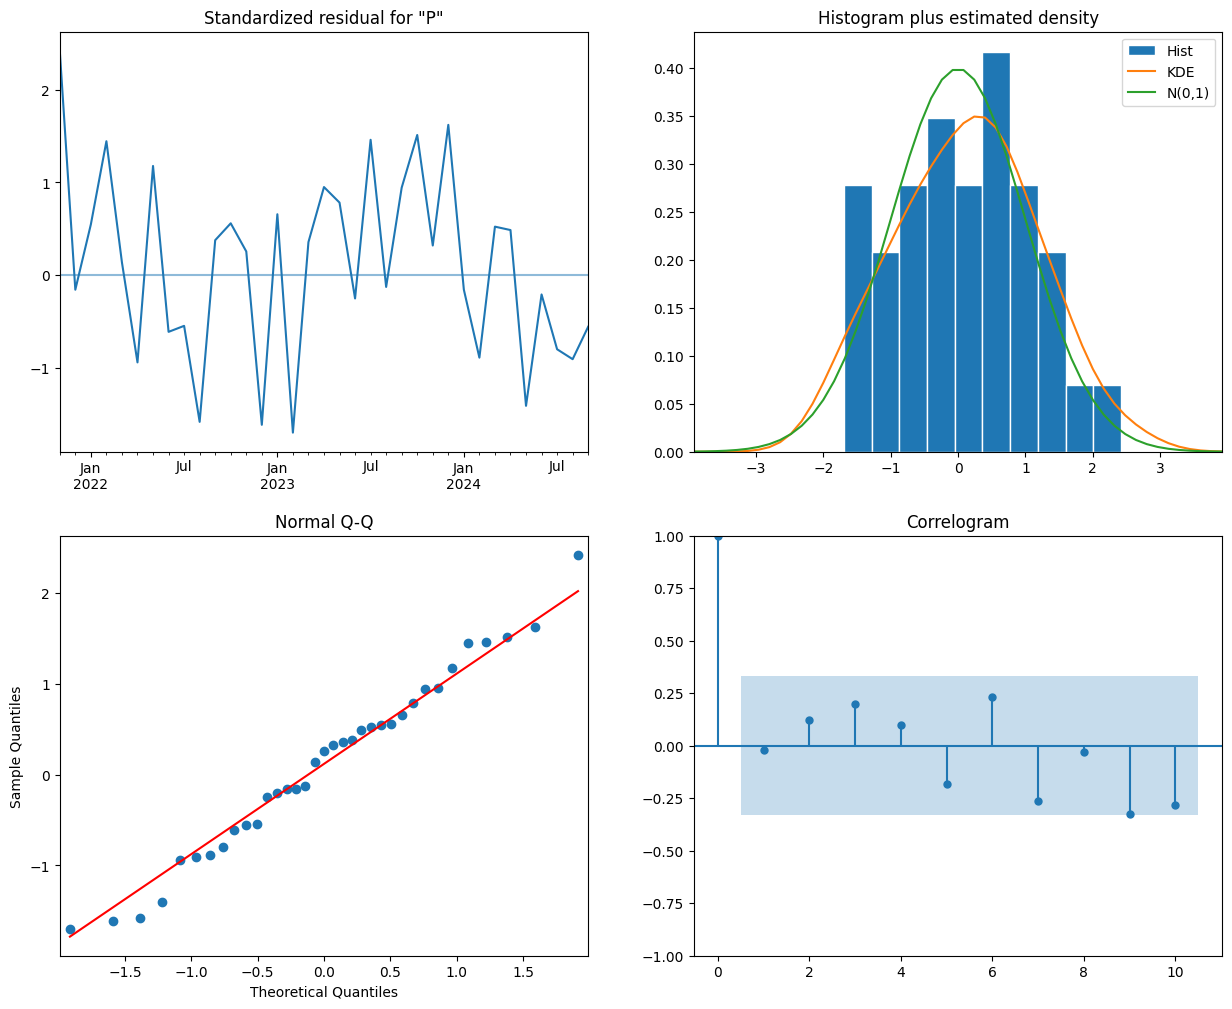

In [20]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

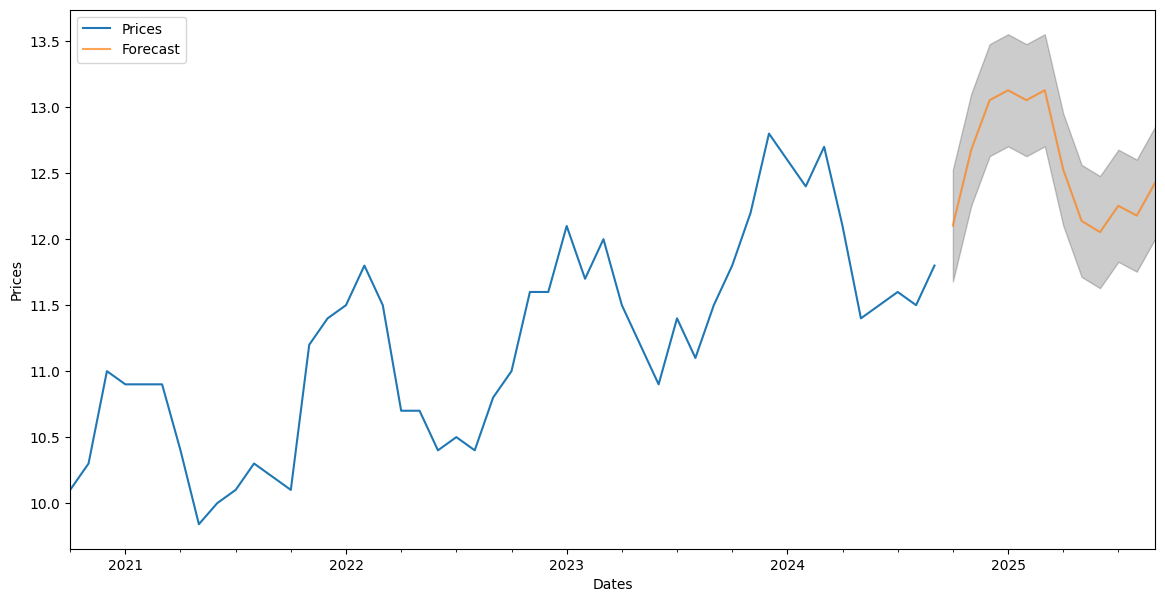

In [21]:
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

ax = time_series.plot(label='Observed', figsize=(14, 7))
forecast.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7)
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Dates')
ax.set_ylabel('Prices')
plt.legend()
plt.show()

#### Reflection
For this kind of problem, a classical time series model like SARIMA is suitable. Additionally, for seasonal market data like commodities, this model works very well and gives decent results in the short term but is not too good for long-term forecasts.

#### Improvement
For better accuracy and forecasting, machine learning models like Random Forest or Gradient Boosting should be used, but they require feature engineering